<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/Convertir%20variables%20categ%C3%B3ricas%20en%20num%C3%A9ricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convertir variables categoricas en numéricas**

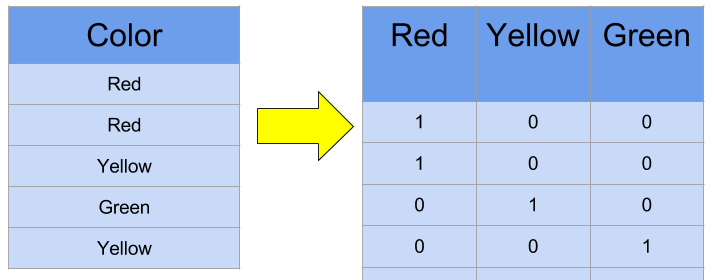

In [2]:
#@title **Método One-Hot**
from IPython.display import Image
Image("/content/drive/MyDrive/imagenes/one_hot.png")

**¿Qué es One Hot Encoding?**

Una codificación one hot es una representación de variables categóricas como vectores binarios.

Esto primero requiere que los valores categóricos se asignen a valores enteros.

Luego, cada valor entero se representa como un vector binario que tiene todos los valores cero excepto el índice del entero, que está marcado con un 1.

**¿Por qué utilizar una codificación One Hot?**

Una codificación one hot permite que la representación de datos categóricos sea más expresiva.

Muchos algoritmos de aprendizaje automático no pueden trabajar directamente con datos categóricos. Las categorías deben convertirse en números. Esto es necesario para las variables de entrada y salida que son categóricas.

En estos casos, nos gustaría darle a la red más poder expresivo para aprender un número similar a la probabilidad para cada posible valor de etiqueta. Esto puede ayudar a que el problema sea más fácil de modelar para la red. Cuando se usa una codificación en caliente para la variable de salida, puede ofrecer un conjunto de predicciones más matizado que una sola etiqueta.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
datos=sns.load_dataset("tips")
datos.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [8]:
numerica=datos.drop(["sex","smoker", "day", "time"], axis=1)
numerica.head(10)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
5,25.29,4.71,4
6,8.77,2.00,2
7,26.88,3.12,4
8,15.04,1.96,2
9,14.78,3.23,2


In [10]:
categorica=datos.filter(["sex","smoker", "day", "time"])
categorica.head(10)

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
5,Male,No,Sun,Dinner
6,Male,No,Sun,Dinner
7,Male,No,Sun,Dinner
8,Male,No,Sun,Dinner
9,Male,No,Sun,Dinner


vamos a empezar con la variable sexo.

vamos a usar de pandas la función get_dummies()

In [19]:
categorica.iloc[:,0]#variable sexo

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [20]:
#usamos la función get_dummies
cat_numerical=pd.get_dummies(categorica.iloc[:,0], drop_first=True)
cat_numerical

,Female
0,1
1,0
2,0
3,0
4,1
...,...
239,0
240,1
241,0
242,0


In [21]:
cat_numerical=pd.get_dummies(categorica.iloc[:,0], drop_first=False)
cat_numerical

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
239,1,0
240,0,1
241,1,0
242,1,0


In [23]:
cat_numerical=pd.get_dummies(categorica, drop_first=True)
cat_numerical

,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1,1,0,0,1,1
1,0,1,0,0,1,1
2,0,1,0,0,1,1
3,0,1,0,0,1,1
4,1,1,0,0,1,1
...,...,...,...,...,...,...
239,0,1,0,1,0,1
240,1,0,0,1,0,1
241,0,0,0,1,0,1
242,0,1,0,1,0,1


In [25]:
datos=pd.concat([numerica, cat_numerical], axis=1)
datos.head(20)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
5,25.29,4.71,4,0,1,0,0,1,1
6,8.77,2.00,2,0,1,0,0,1,1
7,26.88,3.12,4,0,1,0,0,1,1
8,15.04,1.96,2,0,1,0,0,1,1
9,14.78,3.23,2,0,1,0,0,1,1
